# Where to take driving exam? Candidate number: 50691
<hr>

## Objectives(This will be eliminated):
- Expected passing for XYZ in both locations.
- Where should XYZ take the test? Statistical evidence in favour of the decision?
- Justify the methodology used, explain assumptions.
- Final report needs to be understood by non-expert in statistics.
- Commented code, so that it can be understood.
- Strenghts and weaknesses, relate to assumptions I make. Also maybe mention missing data, XYZ thinks his/her driving skill is about average.
- <b>8 pages max, can be shorter</b>


## Abstract
- XYZ has to decide where to take the driving exam, she has a choice between Reading and London. My advice, supported by statistical evidence, is to take the exam in Reading. However the data is not perfect and she has to study hard for the test, as we do not know the skills/ practice lessons of people who take the exam in Reading and London. There is also a time series dimension to be taken into account.
- Mention the expected passing rates, justify my choice for the estimator. 
- Mention methodology used for testing.


<hr> 

In [1]:
ID <- 202215485
source("XYZprofile.r")
XYZprofile(ID)
# With average driving skills.

The profile of XYZ:
- Age:  21
- Gender:  Female
- Home address:  Reading


In [3]:
# To save space.
suppressWarnings({
        library(dplyr)
                })
# library("jpeg")
# library("grid")


## Exploratory data analysis: Figure out how to plot my graph so it looks nice!
Brief executive summary here.

In [4]:
passing_rates_reading <- read.csv("passing_rates_reading.csv")

In [5]:
head(passing_rates_reading,5)

,Location,Age,Conducted,Passes,Pass.rate....,gender,year
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,Reading,17,307,193,62.86645,men,2023-24
2,Reading,18,366,181,49.45355,men,2023-24
3,Reading,19,216,116,53.70370,men,2023-24
4,Reading,20,147,81,55.10204,men,2023-24
5,Reading,21,125,68,54.40000,men,2023-24


pdf 
  2

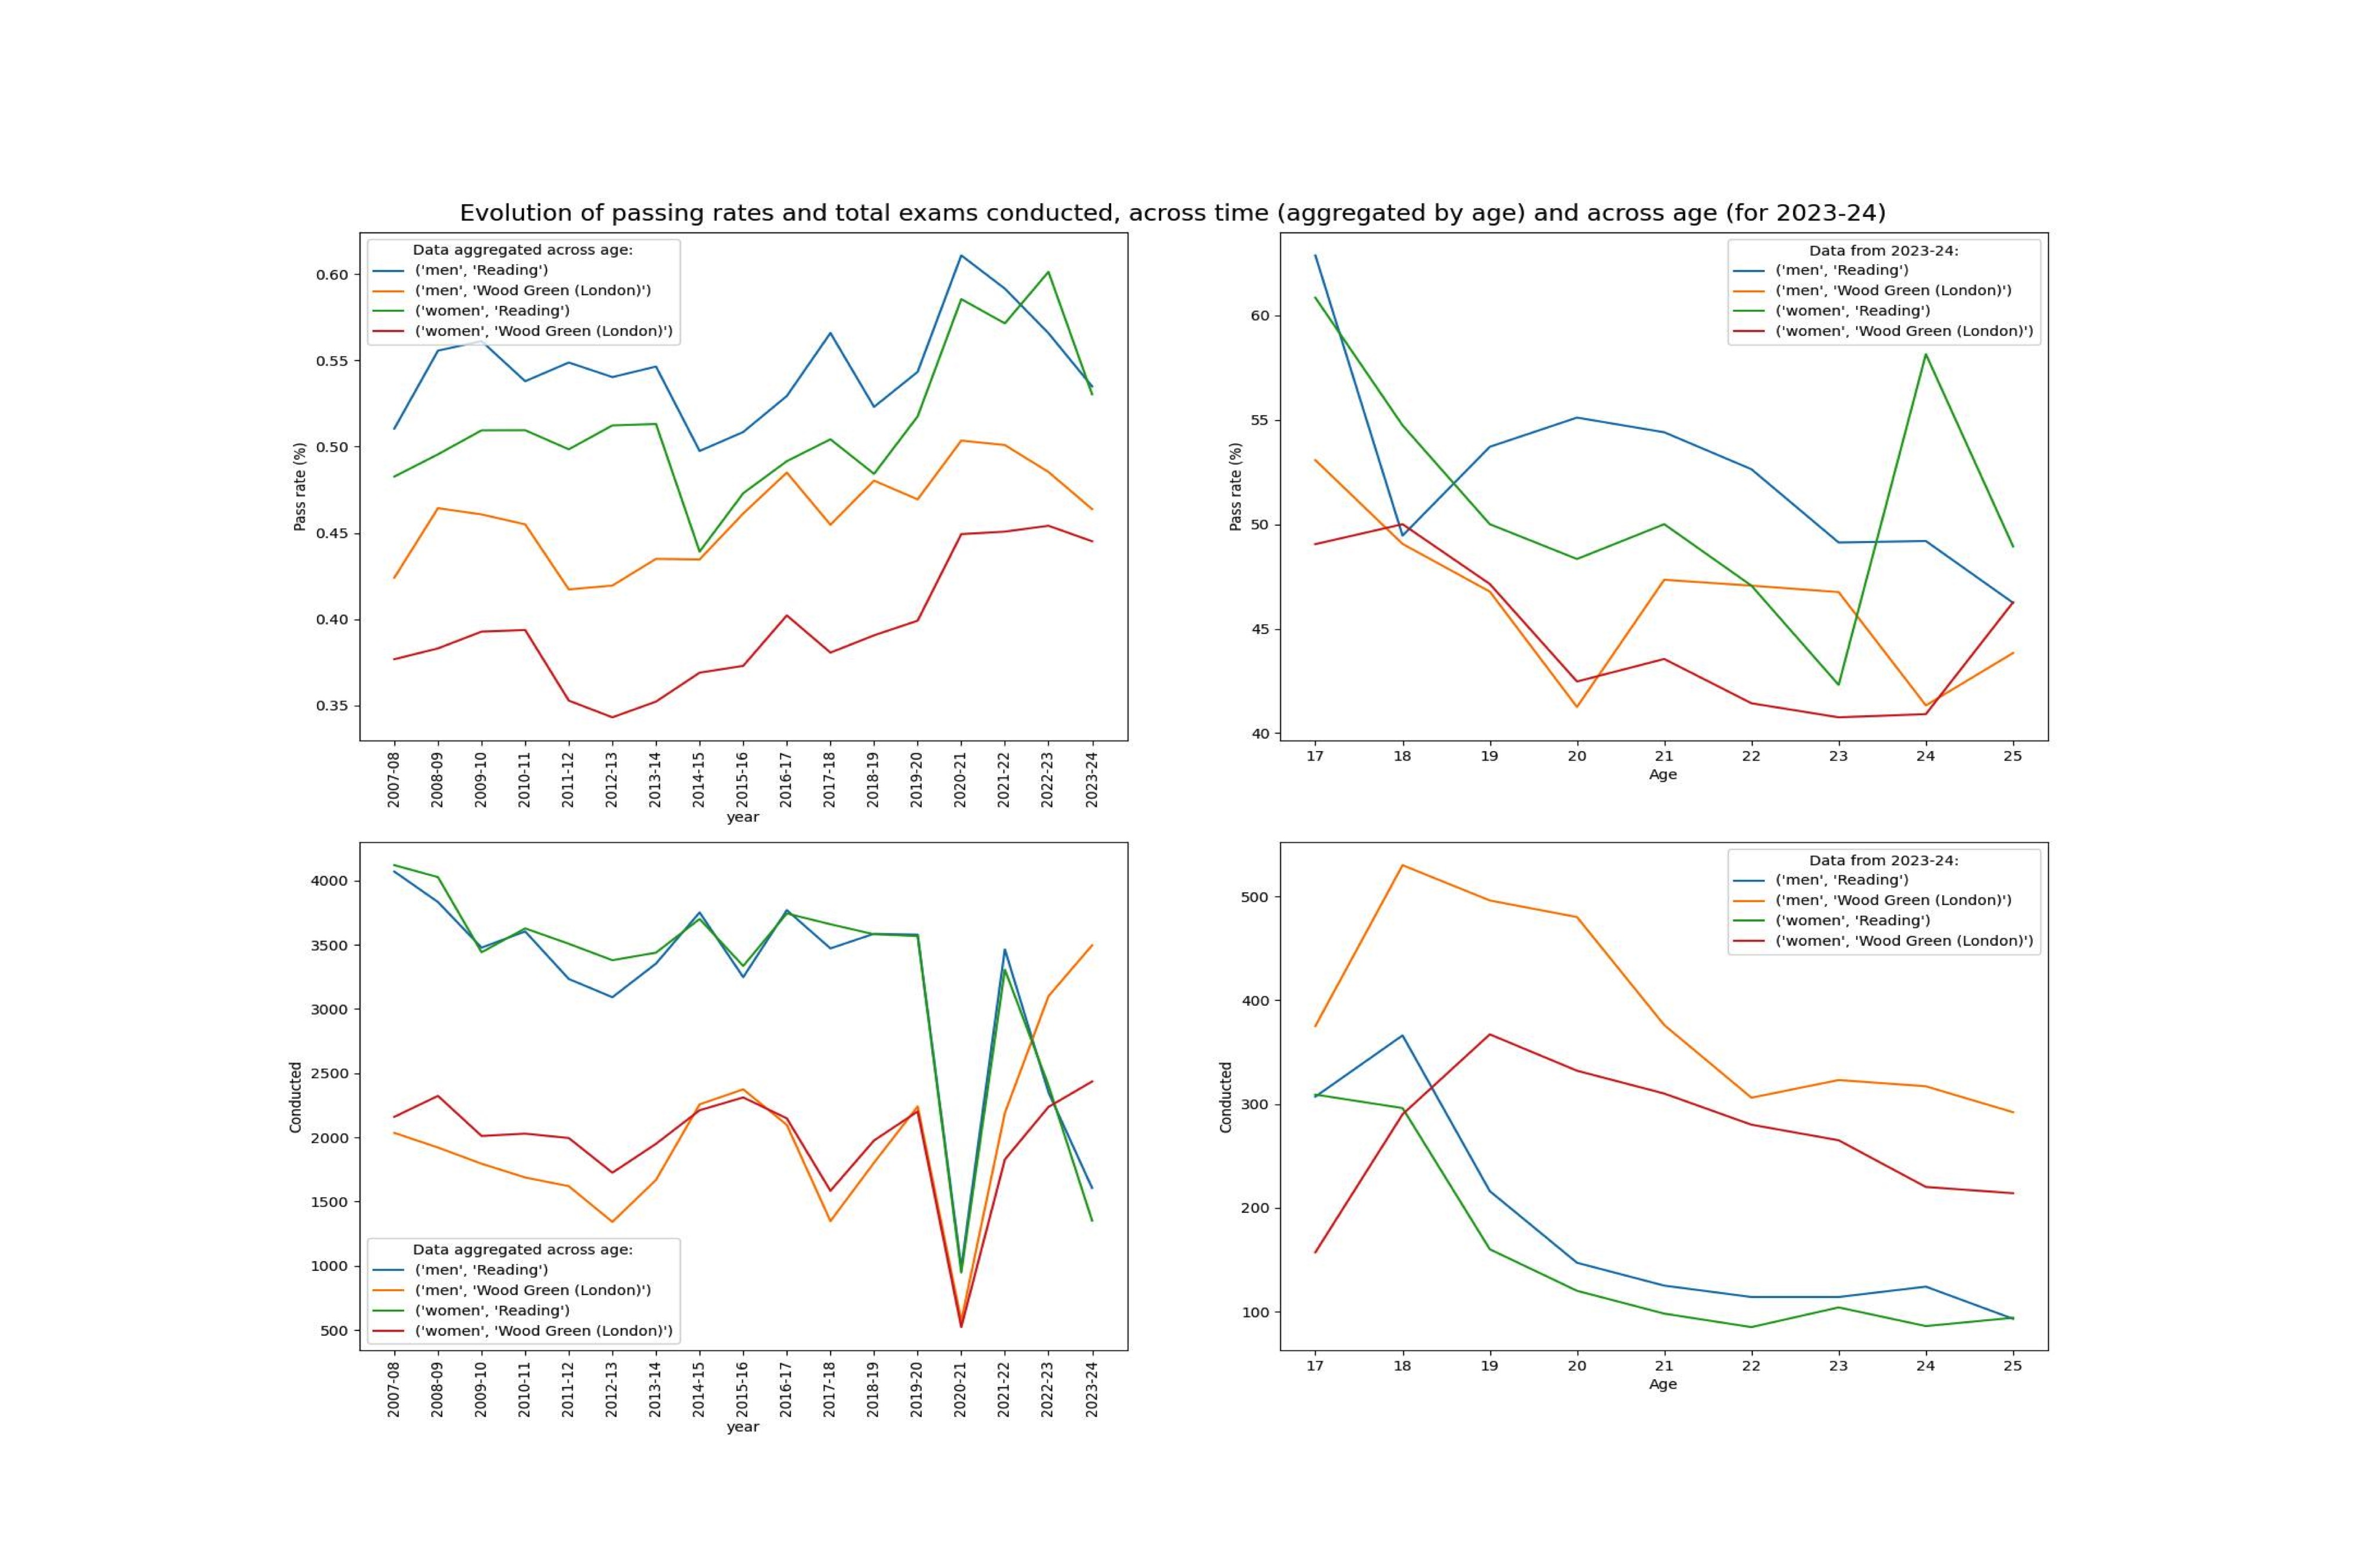

In [6]:
library(jpeg)
library(IRdisplay)

# Load the image
image_path <- "eda.jpeg"  # Replace with your actual file path
img <- readJPEG(image_path)

# Save a temporary image with increased resolution
temp_image <- tempfile(fileext = ".jpg")
jpeg(temp_image, width = 4000, height = 2666)  # Adjust dimensions as needed
par(mar = c(0, 0, 0, 0))  # Remove margins
plot(1:2, type = 'n', xlab = "", ylab = "", xaxt = 'n', yaxt = 'n', bty = 'n')
rasterImage(img, 1, 1, 2, 2)
dev.off()

# Display the image in Jupyter Lab
display_jpeg(file = temp_image)


I use this exploratory data analysis to inform which part of the sample I use for both the prediction and the the test of whether to take the driving in Reading or London.

First let us look at the trends across time - left column of the plot -, we can infer some important facts from this data, which has been aggregated across different ages.
The passing rates in London are lower for both men and women. There seems to be an upward trend in passing rates both in London and Reading, however in the post covid years there seems to be a negative trend, especially in Reading. Also notice that since Covid, there has been a big decrease in the total tests taken in Reading. Finally, males pass the exam at higher rates, especially in London.

Since there seems to be some uncertainty across time -both in passing rates and exams taken- I will only use the last year of available data. Since there are also large differences across gender, I will only be using women to test where XYZ (21 year old woman) should take the exam. 

Now we can look at the differences across ages for the year 2023-24 (right column). We can immediately see that there are differences across ages, some may be due to noise/randomness while there may be some patterns. I would argue that people that take a driving test at 17 are very motivated and prepared, they may need a driver's license to work or may have been driving previously. I do not think these people are equivalent to others who take the driving test later in their lives. On the other hand, I would argue that differences between 21 and 22 years olds are probably due to sampling noise.   

Overall however, I will take the most restrictive approach possible, I will only compare women aged 21 that took the driving test in 2023-24. That may leave me with a small sample and if the results are insatisfactory I will relax my assumptions and see if my results change.

<i>Technical note: I could test to see if the distribution is the same for different ages or years, but we can never know that for sure, at best we would not be able to reject that the distributions are the same, we would never be able to confirm that hypothesis.<i>

<hr>

<b>To do:DEPRECATED I THINK<b>

- Check differences in passing rates for women of a different year, for all years.
- If they are somewhat constant for a decent enough sample size. -> We can bunch women together from 20-23, see the slope.
- If we can bunch ages together maybe time series plot becomes a bit smoother and we can bunch different years together.

<i>On the other hand, if even when bunching time series plot is not smooth we can't use that, so start with time series bunched. If there is a lot of variability we just take latest year, and we just we can just check that year out.<i>

<b>Confirmed time series is not too smooth, for now cut sample to most recent year. AND, within that year it is not too smooth so for test restrict the sample. To just women 21</b>


This reasoning should be a bit better.

## Predicted passing rate. LEFT TO DO FOR NOW.
<b>Especially for conditional probability estimation<b>

Remember for confidence interval quantify the epsilon uncertainty, can be an interesting fact. Is this valid with logit or not? That tutorial from ML class.

## Where to take the test, are the passing rates higher in Reading?

We can start from most restrictive sample scenario, compare only women aged 21 in last year, if we discard with smallest sample we will discard with bigger sample.

To do list:
- Talk about the power of the Wald test. If we increase the population size the test size would increase. 

<hr>

### Derivation of Wald test. Make it less mathematical I guess, put  on note
<b>Assume</b> that all 21 year old women have the same preparation and driving skill.

Then we can say going into exam $R \sim Binomial(N_r,p_r)$ and $Y \sim Binomial(N_l,p_l)$

That is every the probability that someone passes the exam is independent with the probability someone else passes it. 

<b>Assume</b> that the two binomials are independent, seems straightforward but there can be some selection issues and it is tough to formalize.

Then we can set up an MLE estimator which will be smooth over parameter space so it will be asymptotically normal: $f(x,y) =f(x)f(y)$ taking logs means that p1 and p2 will be estimated independently. To get to $f(x)f(y)$ we have used the independence.

Then we have a very nice theorem: 9.14 Theorem. Let $\tau = g(\theta)$ be a function of $\theta$. Let $\hat{\theta}$ be the MLE of $\theta$. Then $\hat{\tau} = g(\hat{\theta})$ is the MLE of $\tau$.

In our case the function is $g(p_r,p_l) = p_r - p_l$ so our MLE will just be the plug in. 
For the variance we can derive it easily through independence $\textbf{V}(\hat{p_r}) + \textbf{V}(\hat{p_l})$

In making the binomial assumption we are assuming that skill is irrelevant or equal skill across candidates, we can discuss this as a limitation in our analysis, talk about sure we can estimate this quantity but practice hours make a huge difference. Omitted variable bias, it could be more expensive to practice in London. Then people pass less but for equal practice times London could be easier. -> A lot of time stuck in traffic :)

In [56]:
size_r <- 98
prob_r <- 49/size_r

size_l <- 310
prob_l <- 135/size_l

In [57]:
prob_r - prob_l

[1] 0.06451613

In [58]:
se_mle <- sqrt( (prob_r)*(1-prob_r)/size_r + (prob_l)*(1-prob_l)/size_l )

In [59]:
W <- (prob_r-prob_l)/se_mle
W

[1] 1.115661

In [60]:
abs(W) > 1.645

[1] FALSE

Under the most strict assumptions we can't discard the null, we either need additional data or a more powerful test.
Add power add sample! -> 21-23 a bit arbitrary on who we include but it seems similar enough! 

In [7]:
### Comment this function a little bit!!!
probs_for_test <- function(df,age=c(21)){
    #Works for any age grouping.
    p_rate_age_subset <- subset(df, Age %in% c(age))
    # I hate the notation I hate the warning.
    p_rate_age_subset <- p_rate_age_subset %>% group_by(gender, year, Location) %>% 
      summarise(conducted=sum(
      Conducted), passes = sum(Passes)
           )
    #Only for 2023-24 function can be further modified.
    p_rate_age_subset <- data.frame(subset(p_rate_age_subset, year=="2023-24" & gender=="women"))
    #p_rate_age_subset$rate <- p_rate_age_subset$passes / p_rate_age_subset$conducted
    rownames(p_rate_age_subset) <- p_rate_age_subset$Location

    pass_r <- p_rate_age_subset["Reading", "passes"]
    tot_r <- p_rate_age_subset["Reading", "conducted"]
    pass_l <- p_rate_age_subset["Wood Green (London)", "passes"]
    tot_l <- p_rate_age_subset["Wood Green (London)", "conducted"]
    #
    data_for_test <- c(pass_r,tot_r,pass_l,tot_l)
    
    return (data_for_test)
}  

In [8]:
wald_test <- function(params){
    pass_r <-params[1]
    size_r <- params[2]
    pass_l <- params[3]
    size_l <-params[4]

    prob_r <-pass_r/size_r
    prob_l <-pass_l/size_l
    
    se_mle <- sqrt( (prob_r)*(1-prob_r)/size_r + (prob_l)*(1-prob_l)/size_l )
    WALD <- (prob_r-prob_l)/se_mle
    
    return(WALD)
}

In [9]:
wald_test(probs_for_test(passing_rates_reading,c(21)))
wald_test(probs_for_test(passing_rates_reading,c(20,21,22)))

`summarise()` has grouped output by 'gender', 'year'. You can override using the `.groups` argument.


[1] 1.115661

`summarise()` has grouped output by 'gender', 'year'. You can override using the `.groups` argument.


[1] 1.817394

Still not enough power!!!

### Permutation test:
Can be used to compare two means even though I don't fully know why!
We have an initial test statistic, we call it t observed.

Make up a random vector even though we do not observe it; (r_1: 1, r_2: 0, r_3: 1, l_1:1 , ... l_n=1) such that the averages sum up to observed passing rates.
Then use random to shuffle this list: argue that same permutation will rarely happen. 
Shuffle and get 1:n_r as the reading obs rest are london.
Compute the statistic and see if it is larger to observed. 1 if so.
Then p value is just sum of ones divided by iterations we take.



In [23]:
permutation_test <- function(params, iter){
    #FIX SO THAT WE HAVE TOTAL AND N PASS
    pass_r <-params[1]
    total_r <- params[2]
    pass_l <- params[3]
    total_l <-params[4]

    
    sample_r <- c(numeric(pass_r)+1, numeric(total_r-pass_r))
    sample_l <- c(numeric(pass_l)+1, numeric(total_l-pass_l))

    full_sample <- c(sample_r, sample_l)
    
    original_statistic <- mean(sample_r) - mean(sample_l)

    larger_than_og <-c()
    
    for (i in 1:iter){
        permutation <- sample(full_sample) # Sampled without replacement.
        # May have to fix it so no vectors are duplicated, I feel the probability is super low anyways.
        
        perm_r <- permutation[1:total_r]
        #Was my code fucked? Probably!
        perm_l <- permutation[(total_r+1):length(permutation)]
        
        #return(length(perm_l))
        
        perm_statistic <- mean(perm_r) - mean(perm_l)

        larger_than_og <- c(larger_than_og, perm_statistic > original_statistic)
        
    } 
    
    return(mean(larger_than_og))
}    

In [28]:
params <- probs_for_test(passing_rates_reading,c(21))
permutation_test(params,10000)


`summarise()` has grouped output by 'gender', 'year'. You can override using the `.groups` argument.


[1] 0.1059

In [22]:
# Even with most restricted sample we have this with very good power.

permutation_test(98,49,310,135,10000)

#It was like 0.07

ERROR: Error in permutation_test(98, 49, 310, 135, 10000): unused arguments (310, 135, 10000)


In [60]:
# Permutation test destroying the Wald.

permutation_test(287,133,855,359,10000)

[1] 0.0409

### Parametric bootstrap can be used to test as well no? DEPRECATED

Initially thought of it for the plots but can be implemented here as well.

We have derived our MLE estimator so parametric bootstrap is here just to draw from Binomial with the plug in estimator which is the sample average.

Talk about relationship between confidence interval and testing.

In [35]:
boot_s <- 100000

In [3]:
#  women 21 for latest year.
#310.0	135.0	
# 98.0	49.0


In [15]:
set.seed(100)
boot_prob_r <- rbinom(boot_s, size_r, prob_r)/size_r
boot_prob_l <- rbinom(boot_s, size_l, prob_l)/size_l


In [21]:
#Smallish sample.

quantile(boot_prob_l,0.025)
quantile(boot_prob_l,0.975)


quantile(boot_prob_r,0.025)
quantile(boot_prob_r,0.975)

2.5% 
0.3806452

97.5% 
0.4903226

2.5% 
0.3979592

97.5% 
0.6020408

## Limitations
- Discussion on time series factor. I largely avoid making predictions for next year, because that is time series and a bit beyond the scope of this course. But it does look like passing rates in Reading are going down.
- Discussion on skill: My estimators kind of aggregate over the skill distribution for both locations. Practice/skill is a very important predictor on passing the exam or not. This might bias our results.
Two hypothetical examples:
- The exam is very difficult in London so people take more lessons to prepare than in Reading, therefore if we conditioned on practice time, the difference in passing rates between Reading and London would be greater.
- Practice lessons are very expensive in London, that may drive people to practice less, if we conditioned on practice time, the difference in passing rates could be smaller or even negative. That might be because although driving in London is more difficult, you are going to be stuck in traffic during half of the exam, which minimizes opportunities to make mistakes.  


## Conclusion

Take the exam in Reading but study hard and hope for a nice examiner.

# Appendix: Building the dataset and making the figures, in Python.
Merge below, clean file first.